#Is the HIV aids epidemic rising or declining

In [24]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline
import requests
import time
from scipy.stats import linregress
import requests
import json
from pprint import pprint
import time
from datetime import datetime


In [74]:
aids= 'persons-living-with-hiv-aids-2011-2017.csv'
death= 'AIDS_deaths_state.csv'
aids = pd.read_csv(aids)
death = pd.read_csv(death)

In [75]:
aids1 = pd.DataFrame(aids)
aids1 = aids1.dropna(how='any')
aids1

,Year,Category,Group,Count
0,2011.0,Age at Year End,0-11,169.0
1,2011.0,Age at Year End,12-14,87.0
2,2011.0,Age at Year End,15-17,180.0
3,2011.0,Age at Year End,18-19,315.0
4,2011.0,Age at Year End,20-24,2971.0
...,...,...,...,...
310,2017.0,Transmission Category: Female Adult or Adolescent,Unknown risk,994.0
311,2017.0,Transmission Category: Female Adult or Adolescent,Other****,136.0
312,2017.0,Transmission Category: Child (<12 Years Old at...,Perinatal,92.0
313,2017.0,Transmission Category: Child (<12 Years Old at...,Unknown risk,16.0


In [84]:
age_year_end = aids1[aids1["Category"]=='Age at Year End']
new_df = pd.DataFrame()
group = []
mean = []
for name in age_year_end['Group'].unique():
    age_groups = age_year_end.loc[age_year_end ["Group"] == name, :]
    mon = age_groups["Count"].mean()
    group.append(age_year_end['Group'].unique())
    mean.append(mon)
    new_df = new_df.append(pd.Series({"Group":name, 'Mean':mon}),ignore_index =True)
new_df

,Group,Mean
0,0-11,143.428571
1,12-14,77.142857
2,15-17,134.857143
3,18-19,270.714286
4,20-24,3030.571429
5,25-29,7238.000000
6,30-34,9869.428571
7,35-39,11407.000000
8,40-44,15013.571429
9,45-49,20976.285714


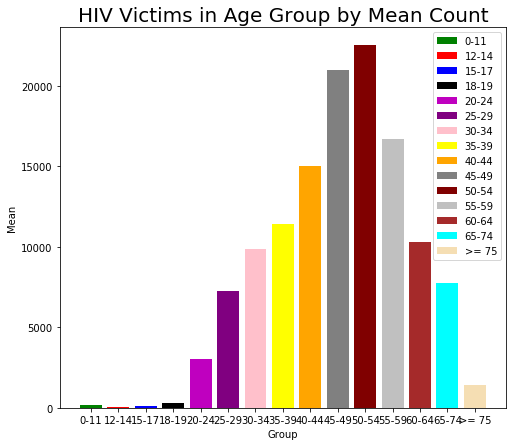

In [104]:
#bar chart per year


plt.figure(figsize=(8,7))
b = plt.bar(age_year_end['Group'].unique(), mean, width=0.8, color=("g", "r","b","black", "m", "purple", "pink", "yellow","orange","grey","maroon","silver", "brown", "cyan", "wheat"))
plt.xlabel('Group')
plt.ylabel('Mean')
plt.title("HIV Victims in Age Group by Mean Count", fontsize=20)
plt.legend(b, age_year_end['Group'].unique())


In [112]:
#what are the counts between 2011 to 2017
years = aids1[aids1["Year"].isin ([2011,2012, 2013, 2014, 2015, 2016, 2017])]
new_df1 = pd.DataFrame()
sum_data = []
for name in years['Year'].unique():
    age_groups = years.loc[years ["Year"] == name, :]
    mon1 = age_groups["Count"].sum()
    sum_data.append(mon1)
    new_df1 = new_df1.append(pd.Series({"Year":name, 'Sum':mon1}),ignore_index =True)
new_df1

,Sum,Year
0,473948.0,2011.0
1,486348.0,2012.0
2,496940.0,2013.0
3,505504.0,2014.0
4,517264.0,2015.0
5,531632.0,2016.0
6,540328.0,2017.0


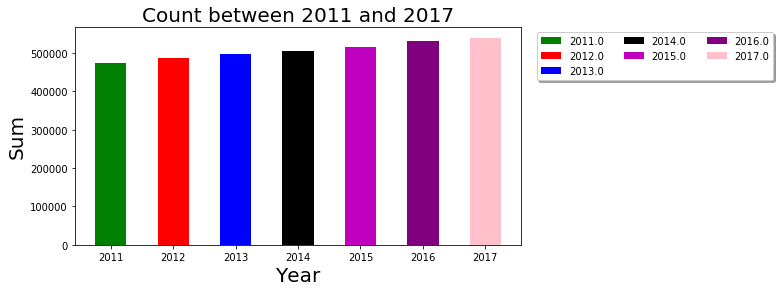

In [140]:
#bar chart per year
plt.figure(figsize=(8,4))
b1 = plt.bar(years['Year'].unique(), sum_data, width=0.5, color=("g", "r","b","black", "m", "purple", "pink"))
plt.xlabel('Year',  fontsize=20)
plt.ylabel('Sum',  fontsize=20)
plt.title("Count between 2011 and 2017", fontsize=20)
plt.legend(b1, years['Year'].unique(), loc='upper center', bbox_to_anchor=(1.30, 1.0),
          ncol=3, fancybox=True, shadow=True)
plt.show()




In [120]:
#what are the reasons for contraction? 
contractions = aids1[aids1["Group"].isin (["Male-to-male sexual contact (MMSC)",
                                              "Injection drug use (IDU)",
                                              "MMSC and IDU",
                                          "High-risk heterosexual contact (HRH)**",
                                          "Heterosexual contact (Non-HRH)***",
                                          "Perinatal",
                                          "Unknown risk",
                                          "Other****"
                                          ])]
new_df2 = pd.DataFrame()
mean_data = []
for name in contractions['Group'].unique():
    cat = years.loc[years ["Group"] == name, :]
    mon2 = cat["Count"].mean()
    mean_data.append(mon2)
    new_df2 = new_df2.append(pd.Series({"Type":name, 'Mean':mon2}),ignore_index =True)
new_df2

,Mean,Type
0,85485.571429,Male-to-male sexual contact (MMSC)
1,4088.928571,Injection drug use (IDU)
2,9657.571429,MMSC and IDU
3,5649.071429,High-risk heterosexual contact (HRH)**
4,3270.142857,Heterosexual contact (Non-HRH)***
5,242.333333,Perinatal
6,1519.857143,Unknown risk
7,135.850000,Other****


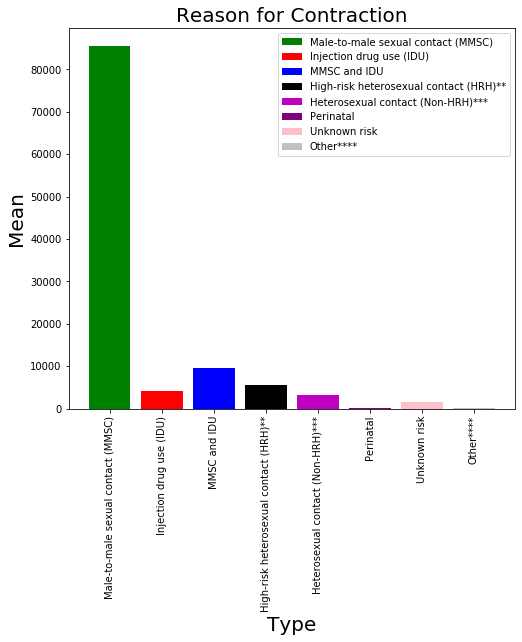

In [129]:
#bar charts
plt.figure(figsize=(8,7))
#b = plt.bar(aids1["Year"], aids1["Count"], width=0.8, color=("g"))
q = plt.bar(contractions['Group'].unique(), mean_data, width=0.8, color=("g", "r","b","black", "m", "purple", "pink","silver"))
plt.xticks(rotation=90)
plt.xlabel('Type',  rotation='0', fontsize=20)

plt.ylabel('Mean',  fontsize=20)
plt.title("Reason for Contraction", fontsize=20)
plt.legend(q, contractions['Group'].unique())
plt.show()



In [ ]:
#what race/ethnicity is affected the most

In [ ]:
#pie chart

In [ ]:
#what gender is mostly affected?

In [ ]:
#pie chart

In [ ]:
#how many deaths per year come from aids/hiv

In [ ]:
#bar chart

In [ ]:
#what state has the highest death rate per year
#weightavg = onlyc.groupby(["Mouse ID"], as_index=False)["Weight in Grams"].mean()

In [ ]:
#scatterplot state population vs. aids death per year